<Figure size 640x480 with 0 Axes>

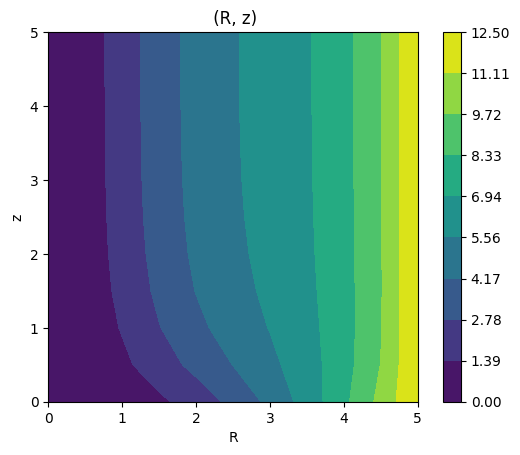

<Figure size 640x480 with 0 Axes>

In [ ]:
#Force Free Equilibrium - Relaxation

import numpy as np
import matplotlib . pyplot as plt
import matplotlib . animation as animation
import numpy as np
import matplotlib .cm as cm
import matplotlib . mlab as mlab
import matplotlib . pyplot as plt
import matplotlib


n = 1000 # number of iterations , for 10000 iterations the run takes about 1 minute .


nR = 11 #x resolution
nz = 11 #y resolution
Psi = np. zeros ((nR ,nz))
I = np. zeros ((nR ,nz))
dI = np. zeros ((nR ,nz))

Eq = np. zeros ((nR ,nz))
Result = np. zeros ((4 , nR*nz))
r = np. zeros (nR)
z = np. zeros (nz)
R_min = 0.
R_max = 5.

R0 = 1.
B0 = 1
B1 = 5
z_min = 0.
z_max = 5.
dr = ( R_max - R_min ) / (nR - 1)
dz = ( z_max - z_min ) / (nz - 1)
# Setting the values of r and z
for i in range (0, nR):
  r[i] = i*dr

for i in range (0, nz):
  z[i] = i*dz
# Boundary conditions Psi(R, z_min ) =0.5* B0*R**2
for i in range (0, nR):
  Psi [i, 0] = 0.5* B0*r[i ]**2
# Boundary conditions Psi(R_min ,z)=0
# Boundary conditions Psi(R_max ,z) =0.5* B0* R_max **2
for j in range (0, nz):
  Psi [0, j] = 0
  Psi [nR -1, j] = 0.5* B0* R_max **2

# Solution of Equation : drr Psi + dzz Psi - (1/r)* drPsi + I*dI= 0



for k in range (0, n):
#In this loop we evaluate the deivatives
  for i in range (1, nR -1):
    for j in range (1, nz -1):
      drrPsi =( Psi[i+1,j] -2* Psi[i,j]+ Psi[i -1,j])/dr **2
      dzzPsi =( Psi[i,j+1] -2* Psi[i,j]+ Psi[i,j -1]) /dz **2
      drPsi = ( Psi[i+1,j]-Psi[i -1,j]) /(2* dr)

      dI[i,j] = B1*R0 *((2* np.pi)/( B0* R_max **2) )*np. cos((2* np.pi*Psi[i,j]) /( B0* R_max **2) )


      I[i,j] = B1*R0*np.sin ((2* np.pi* Psi[i,j]) /( B0*R_max **2) )


      Eq[i,j] = drrPsi + dzzPsi - (1/ r[i])* drPsi + I[i,j]* dI[i,j]

      Psi [i,j] = Psi[i,j] + Eq[i,j]* dr*dz *0.1



# Boundary conditions at (R, z_max )=Psi[R, z_max -1]
  for i in range (1,nR -1):
    Psi [i, nz -1] = Psi [i, nz -2]
  for i in range (0, nR):
    I[i,nR -1] = I[i,nR -2]
    dI[i,nR -1] = dI[i,nR -2]

#In this loop we save the results in a single array
for i in range (0, nR):
  for j in range (0, nz):
    k=i*nR+j

    Result [0, k] = r[i]
    Result [1, k] = z[j]
    Result [2, k] = Psi[i,j]
  Result [3, k] = I[i,j]


# Here we plot the results
X = Result [0, :]. reshape (nR ,nz)
Y = Result [1, :]. reshape (nR ,nz)
Z = Result [2, :]. reshape (nR ,nz)
W = Result [3, :]. reshape (nR ,nz)
plt . figure (1)
fig = plt. figure (dpi =100)
ax1 = fig. add_subplot (1 ,1 ,1 , aspect =1, xlim =[ R_min , R_max ],
ylim =[ z_min , z_max ])
ax1 . set_title (" (R, z)")
ax1 . set_xlabel ("R")
ax1 . set_ylabel ("z")
s=np.linspace(0,12.5, 10)
Psi_plot = ax1. contourf (X,Y,Z, levels=s)
clbar = plt. colorbar ( Psi_plot )
fig = plt. figure (dpi =100)

